# Comparisons of Divergent Semantic Integration scores in LLMs generated creative writing tasks
Table of content:
1. Load data and concatenate
2. Overview
3. Plot models' performance across temperatures
### Dependencies

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import glob

In [28]:
results_df = pd.read_csv("../machine_DSI_output.csv", header=0, sep=",")


In [29]:
human_haiku = pd.read_csv("../human_DSI_output.csv", header=0, sep=",")
# replace temp n.a with Mid to compare with LLMs
human_haiku['temp'].replace('n.a', 'Mid', inplace=True)

In [30]:
imdb = pd.read_csv("../IMDB_subset_DSI_output.csv", header=0, sep=",")
# replace temp n.a with Mid to compare with LLMs
imdb['temp'].replace('n.a.', 'Mid', inplace=True)#
# make identification more explicit
imdb["model"].replace("IMDB", "IMDB (human)", inplace=True)

In [31]:
vicuna = pd.read_csv("../Vicuna_DSI_output.csv", header=0, sep=",")

In [32]:
results_df = pd.concat([results_df, human_haiku, imdb, vicuna], axis=0)
#results_df = pd.read_csv("../concatenated_results_stories.csv", header=0, sep=",")
results_df.to_csv("concatenated_results_stories.csv", index=False)

In [40]:
print(results_df.model.unique())
print(results_df.keys())
results_df.loc[results_df['lziv'].isnull()].model.unique()

['GPT3' 'GPT4' 'human' 'IMDB (human)' 'Vicuna']
Index(['DSI', 'story', 'model', 'condition', 'temp', 'num_words', 'lziv'], dtype='object')


array(['GPT3', 'GPT4', 'human', 'IMDB (human)'], dtype=object)

## Plot all distributions seprately to get an overview

Works: synopsis High
Works: synopsis Very Low
Works: synopsis Low
Works: synopsis Mid
Works: synopsis Very High
Works: haiku High
Works: haiku Very Low
Works: haiku Low
Works: haiku Mid
Works: haiku Very High
poem High
poem Very Low
poem Low
Works: poem Mid
poem Very High
Works: flash-fiction High
Works: flash-fiction Very Low
Works: flash-fiction Low
Works: flash-fiction Mid
Works: flash-fiction Very High


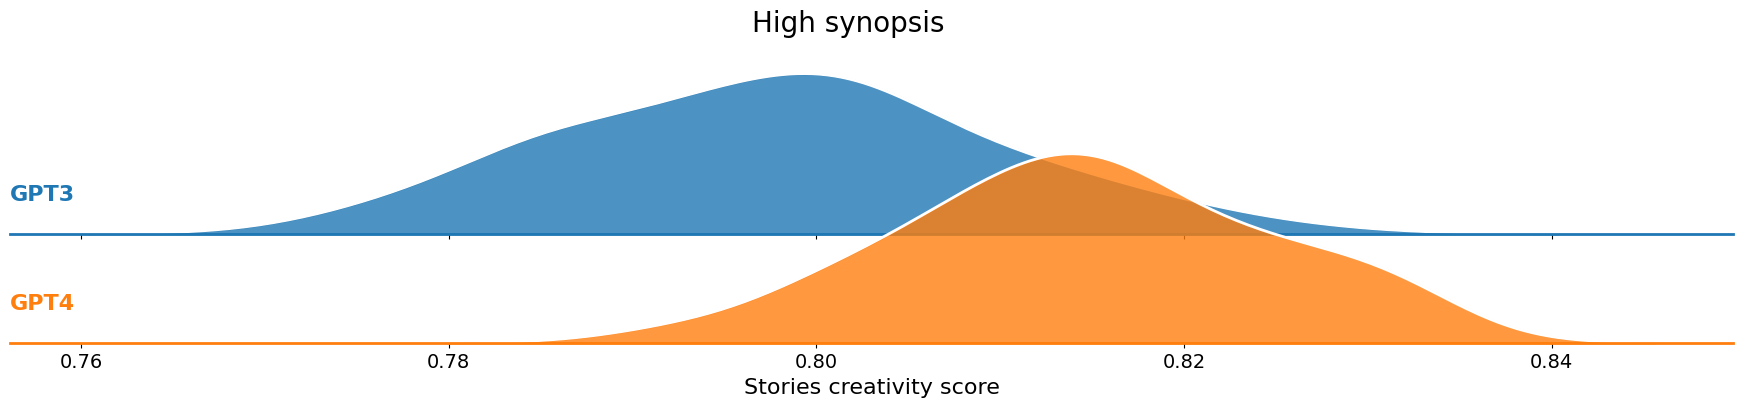

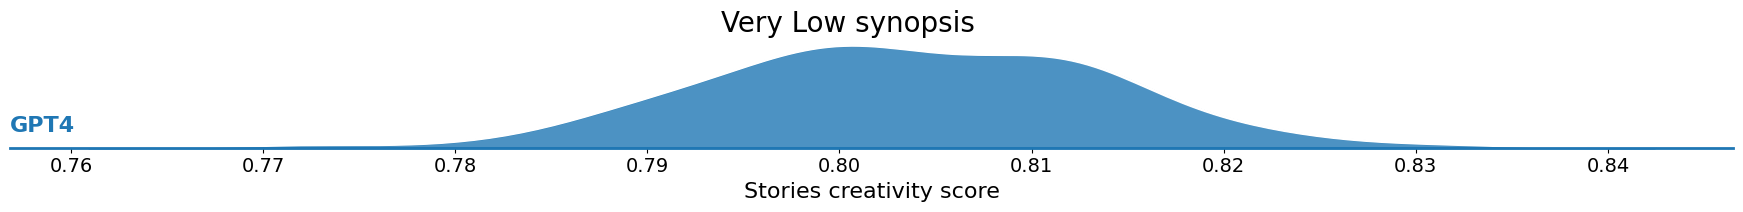

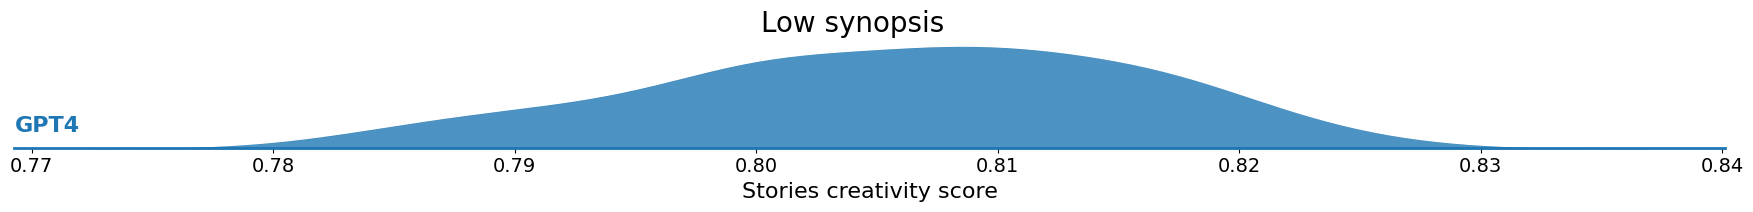

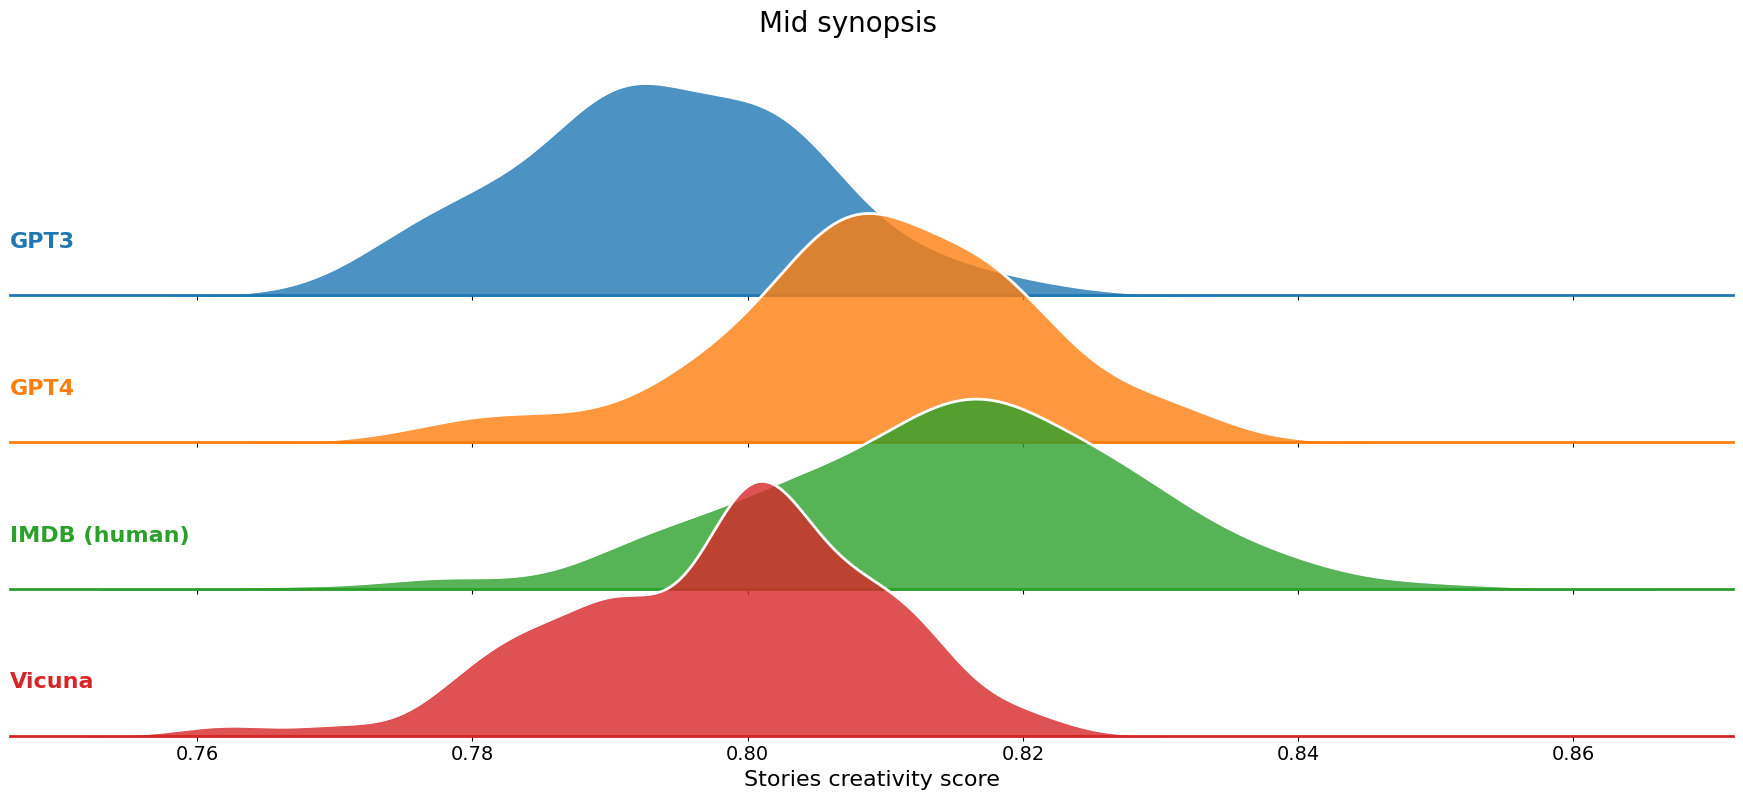

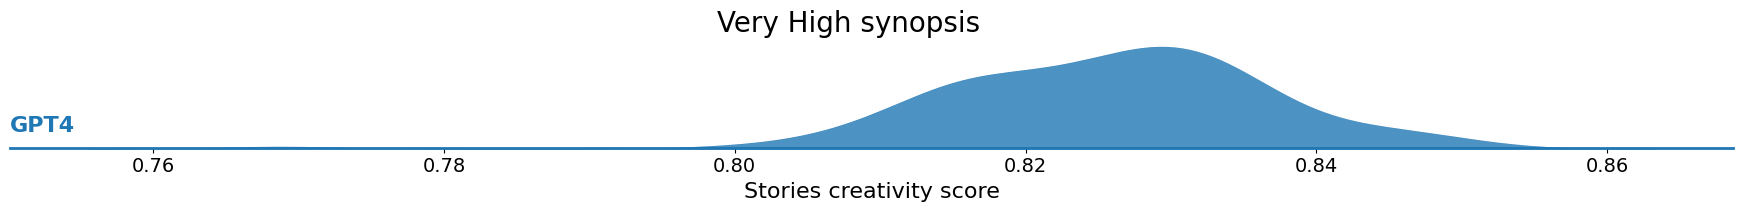

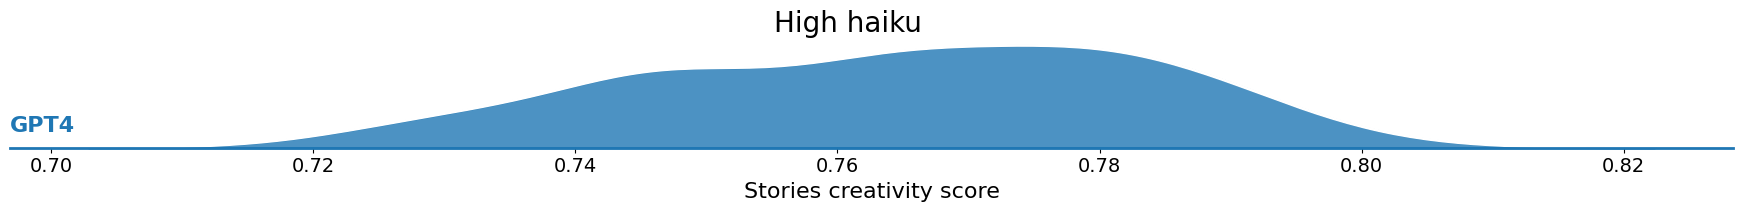

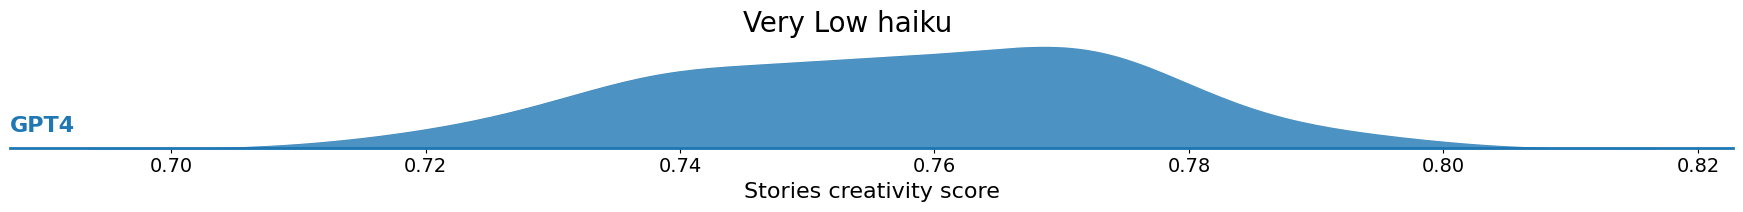

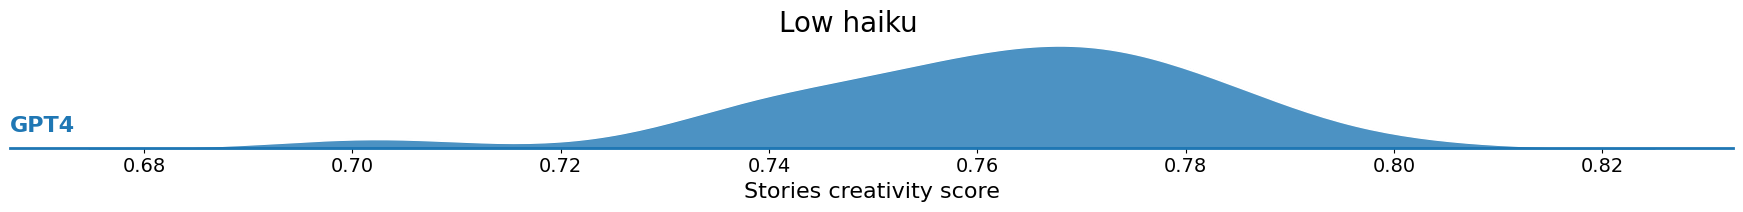

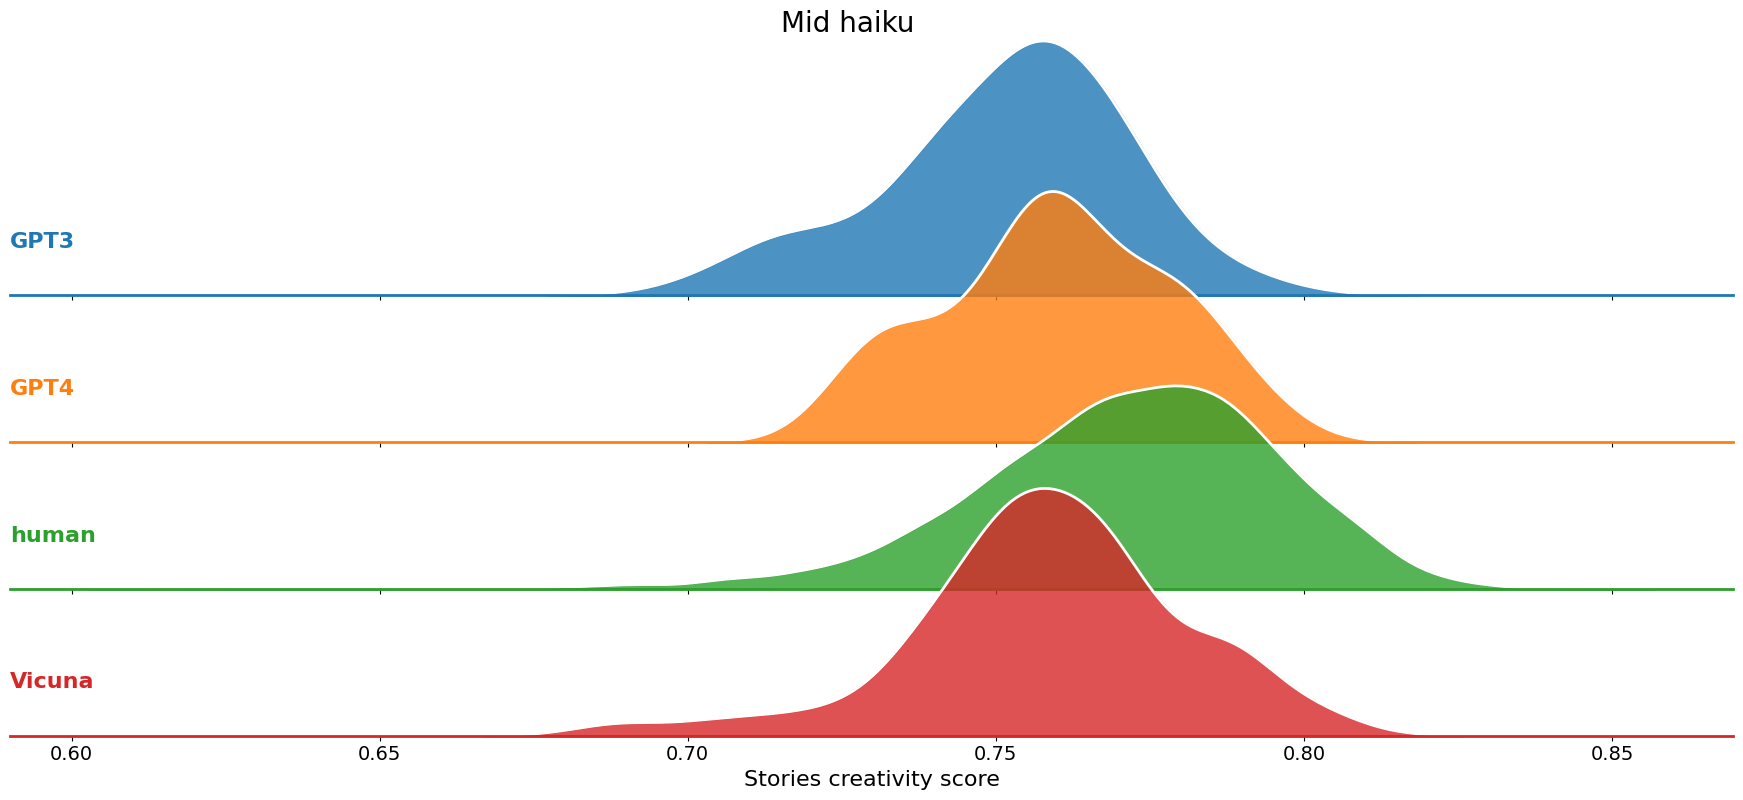

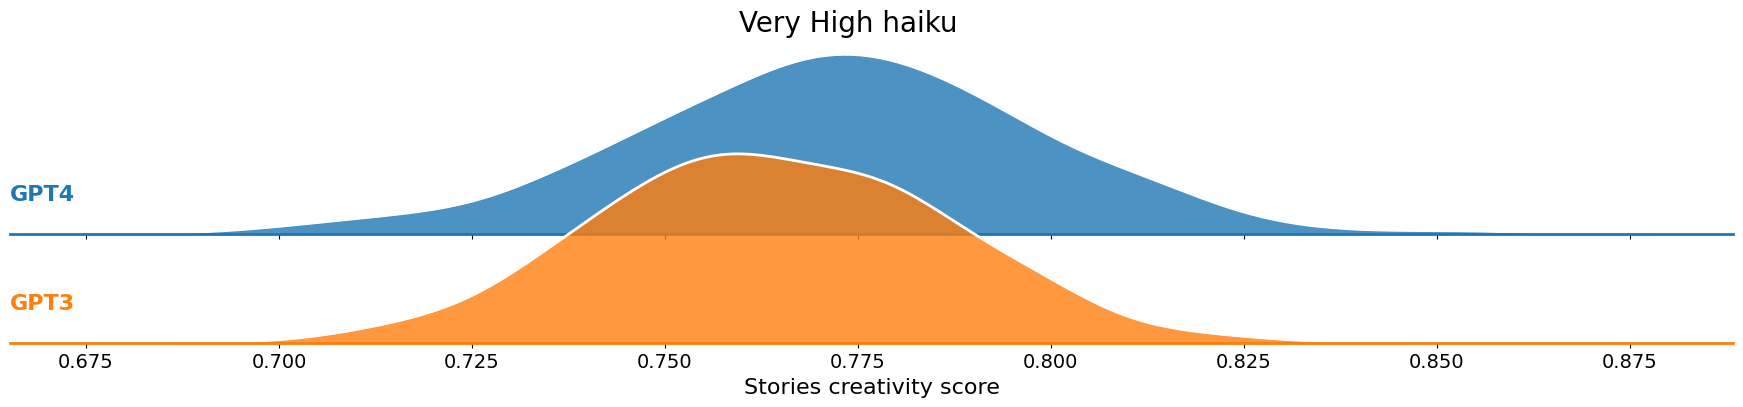

<Figure size 1800x0 with 0 Axes>

<Figure size 1800x0 with 0 Axes>

<Figure size 1800x0 with 0 Axes>

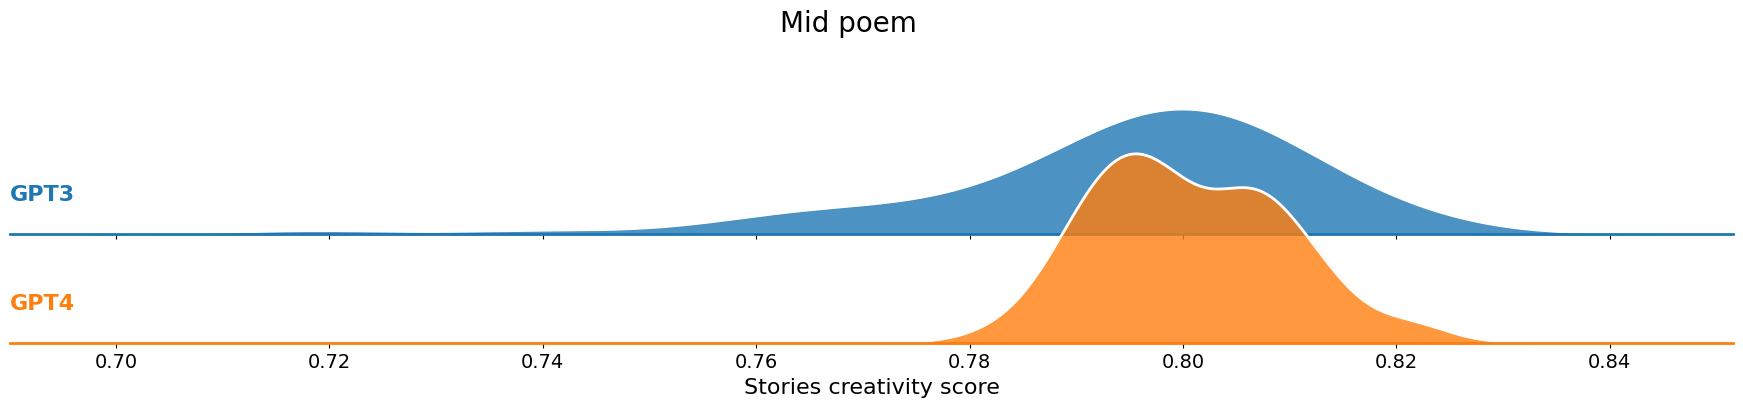

<Figure size 1800x0 with 0 Axes>

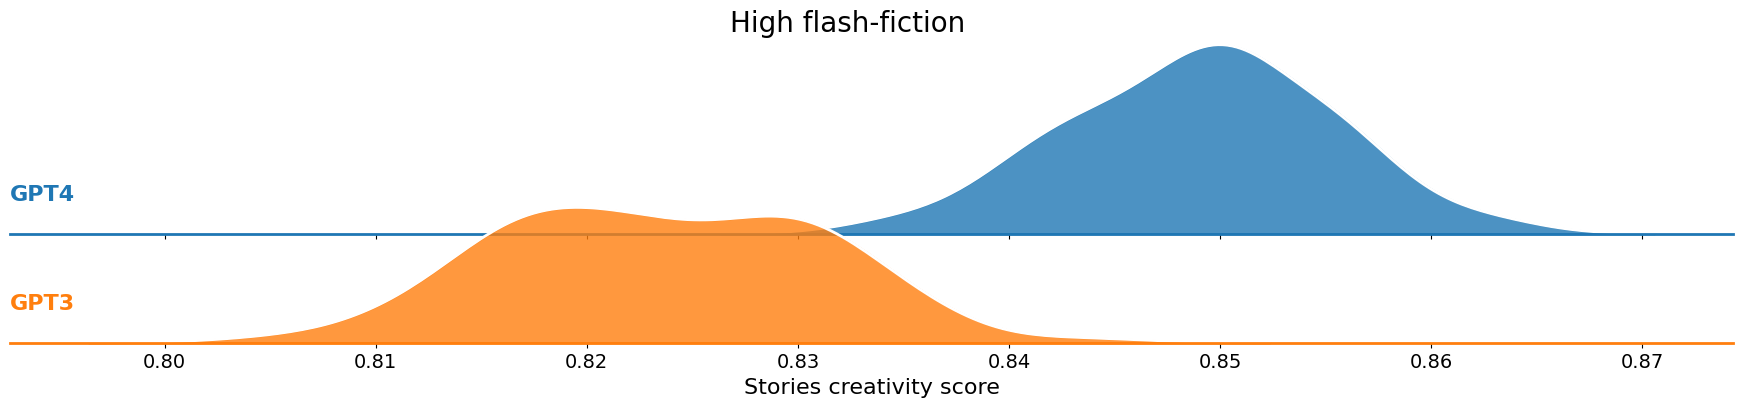

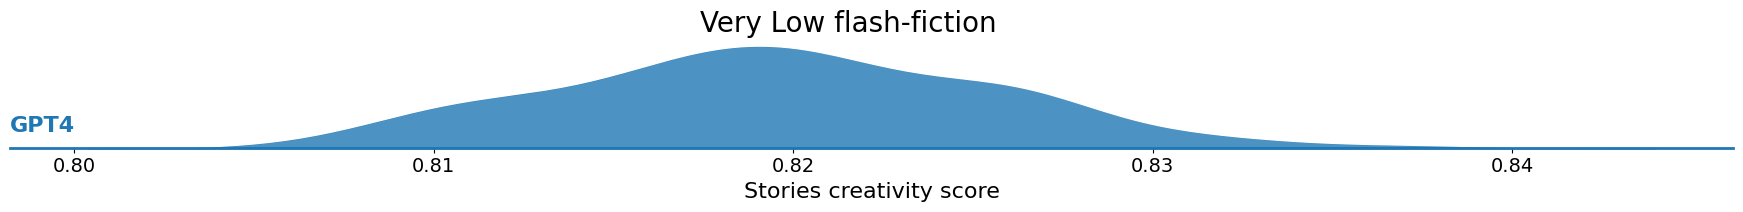

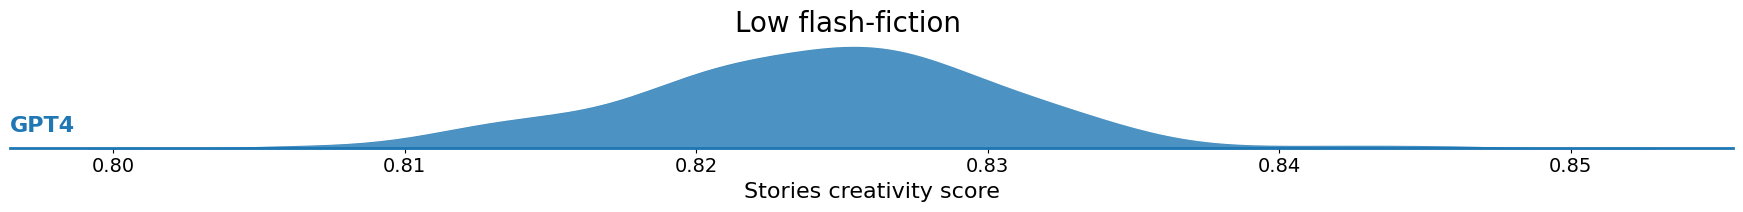

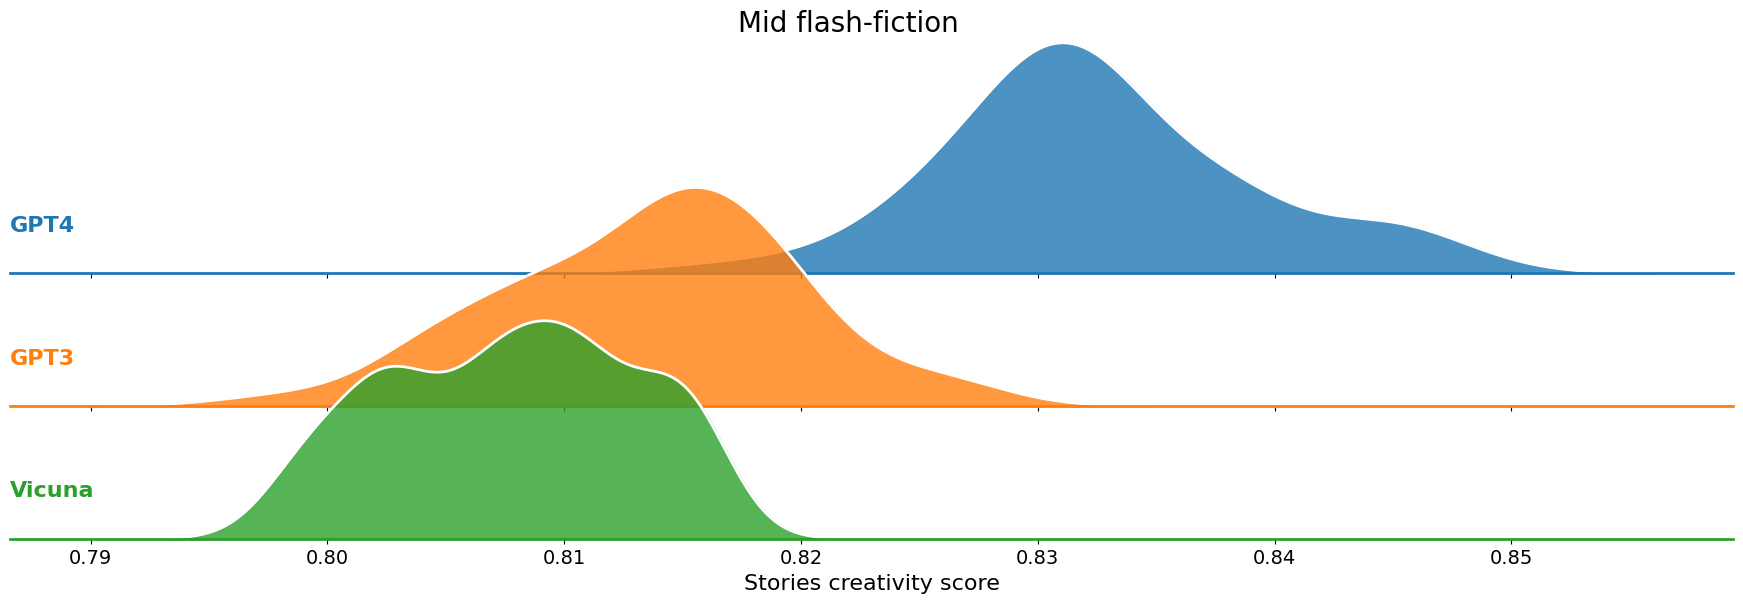

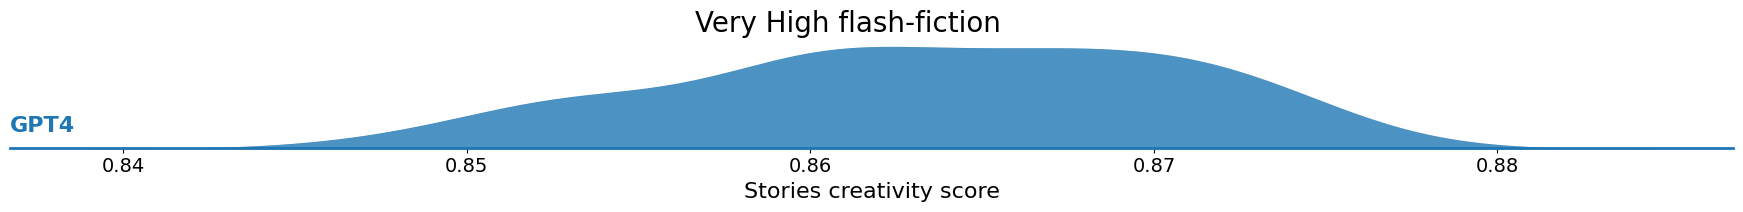

In [24]:
for condition in results_df['condition'].unique():
    for temp in results_df['temp'].unique(): 
        df = results_df[['model', 'condition', 'DSI']].loc[(results_df['condition']==condition) & (results_df['temp']==temp)]
        try:
            g = sns.FacetGrid(df, row="model", hue="model", aspect=9, height=1.3,)
            print("Works:", condition, temp)
        except ValueError:
            print(condition, temp)
            continue

        # make transparent background
        for ax in g.axes.flat:
            ax.set_facecolor('none')
        # Draw the densities in a few steps
        g.map(sns.kdeplot, "DSI",
            bw_adjust=1, clip_on=False,
            fill=True, alpha=0.8, linewidth=1.5)
        g.map(sns.kdeplot, "DSI", clip_on=False, color="w", lw=2, bw_adjust=1)
        # passing color=None to refline() uses the hue mapping
        g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
        # Define and use a simple function to label the plot in axes coordinates
        def label(x, color, label):
            ax = plt.gca()
            # check if Human is in the label
            ax.text(0, .2, label, fontweight="bold", color=color,
                    ha="left", va="center", transform=ax.transAxes,fontsize=16)
        g.map(label, "DSI")


        for ax in g.axes.flat:
            ax.set_xlabel('Stories creativity score', fontsize=16)
            for label in ax.get_xticklabels():
                    label.set_fontsize(14)
        # Remove axes details that don't play well with overlap
        g.set_titles("")
        # Set the subplots to overlap
        g.figure.subplots_adjust(hspace=-.45)
        g.set(yticks=[], ylabel="")
        g.despine(bottom=True, left=True)
        g.fig.suptitle(f'{temp} {condition}', fontsize=20)
        #g.savefig(f'../figures/DSI_ridge_{temp}_{condition}.png', dpi=300, bbox_inches='tight')

## Plot temperatures for Flash fiction
### GPT-3

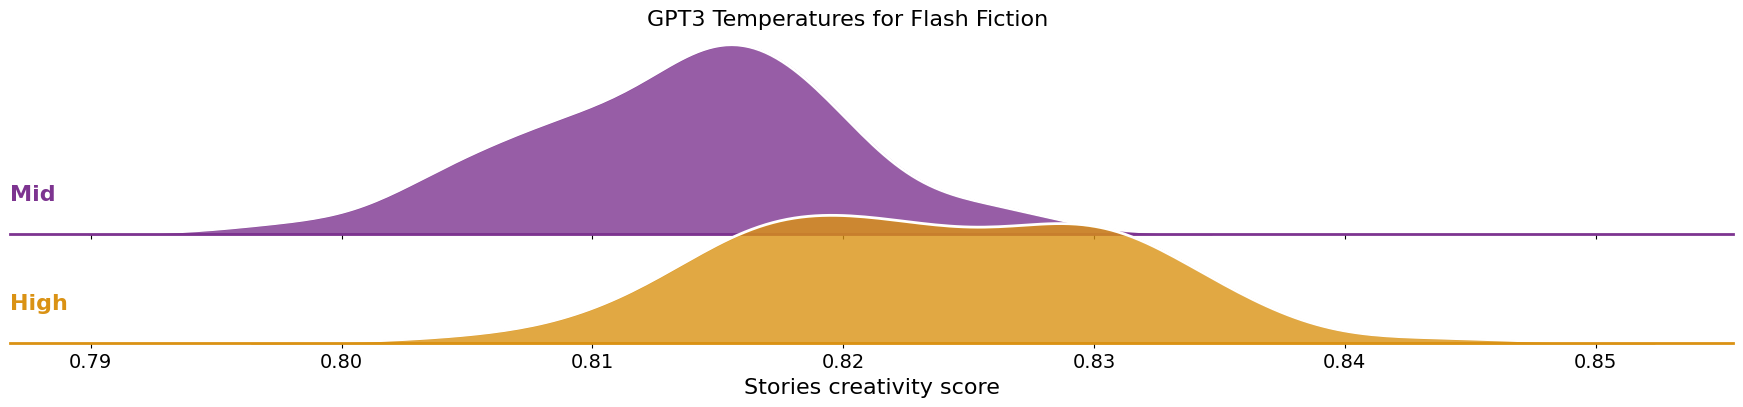

In [9]:
# Make a ridge plot like the one above looking at the effect of temperature on the DSI for each model separetaly
df = results_df.loc[(results_df['condition']=='flash-fiction') & (results_df['model']=='GPT3')]
pal = sns.color_palette('CMRmap',n_colors=2, desat=.9)
order = ["Mid", "High"]
g = sns.FacetGrid(df, row="temp", hue="temp", aspect=9, height=2,palette=pal, hue_order=order, row_order=order)
# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "DSI",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "DSI", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "DSI")


for ax in g.axes.flat:
    ax.set_xlabel('Stories creativity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# add one title for all the subplots
g.fig.suptitle('GPT3 Temperatures for Flash Fiction', fontsize=16)
g.savefig(f'../figures/GPT3_DSI_ridge_flashfiction_temp.png', dpi=300, bbox_inches='tight')

### GPT-4

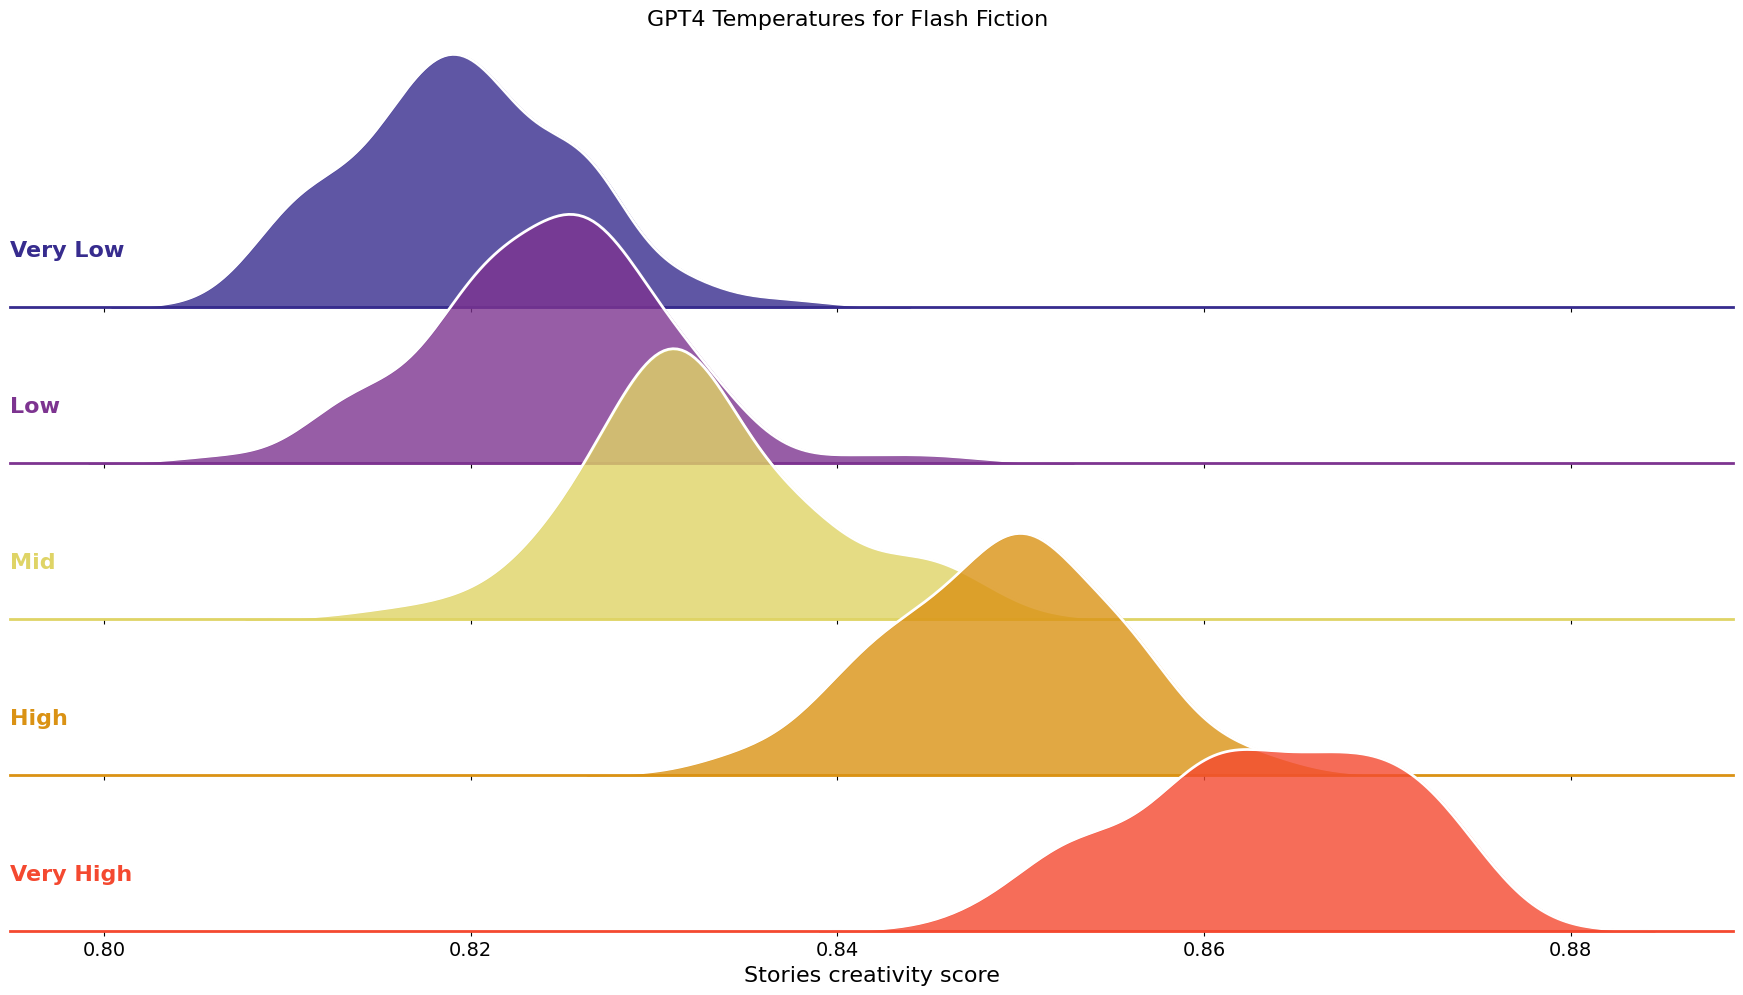

In [10]:
# Make a ridge plot like the one above looking at the effect of temperature on the DSI for each model separetaly
df = results_df.loc[(results_df['condition']=='flash-fiction') & (results_df['model']=='GPT4')]
pal = sns.color_palette('CMRmap',n_colors=5, desat=.9)
pal = [pal[0], pal[1], pal[4], pal[3], pal[2]]
order = ["Very Low", "Low", "Mid", "High", "Very High"]
g = sns.FacetGrid(df, row="temp", hue="temp", aspect=9, height=2,palette=pal, row_order=order, hue_order=order)
# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "DSI",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "DSI", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "DSI")


for ax in g.axes.flat:
    ax.set_xlabel('Stories creativity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# add one title for all the subplots
g.fig.suptitle('GPT4 Temperatures for Flash Fiction', fontsize=16)
g.savefig(f'../figures/GPT4_DSI_ridge_flashfiction_temp.png', dpi=300, bbox_inches='tight')

## Plot temperatures for Haikus
### GPT-3

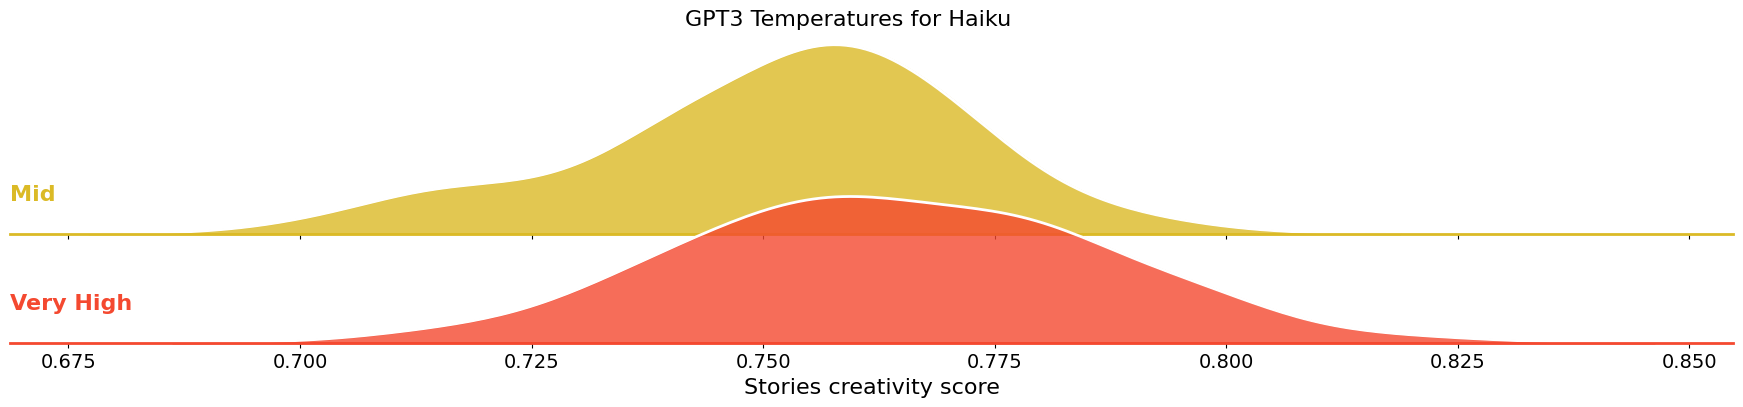

In [11]:
# Make a ridge plot like the one above looking at the effect of temperature on the DSI for each model separetaly
df = results_df.loc[(results_df['condition']=='haiku') & (results_df['model']=='GPT3')]
pal = sns.color_palette('CMRmap',n_colors=3, desat=.9)
pal.reverse()
g = sns.FacetGrid(df, row="temp", hue="temp", aspect=9, height=2,palette=pal)
# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "DSI",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "DSI", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "DSI")


for ax in g.axes.flat:
    ax.set_xlabel('Stories creativity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# add one title for all the subplots
g.fig.suptitle('GPT3 Temperatures for Haiku', fontsize=16)
g.savefig(f'../figures/GPT3_DSI_ridge_haiku_temp.png', dpi=300, bbox_inches='tight')

### GPT4

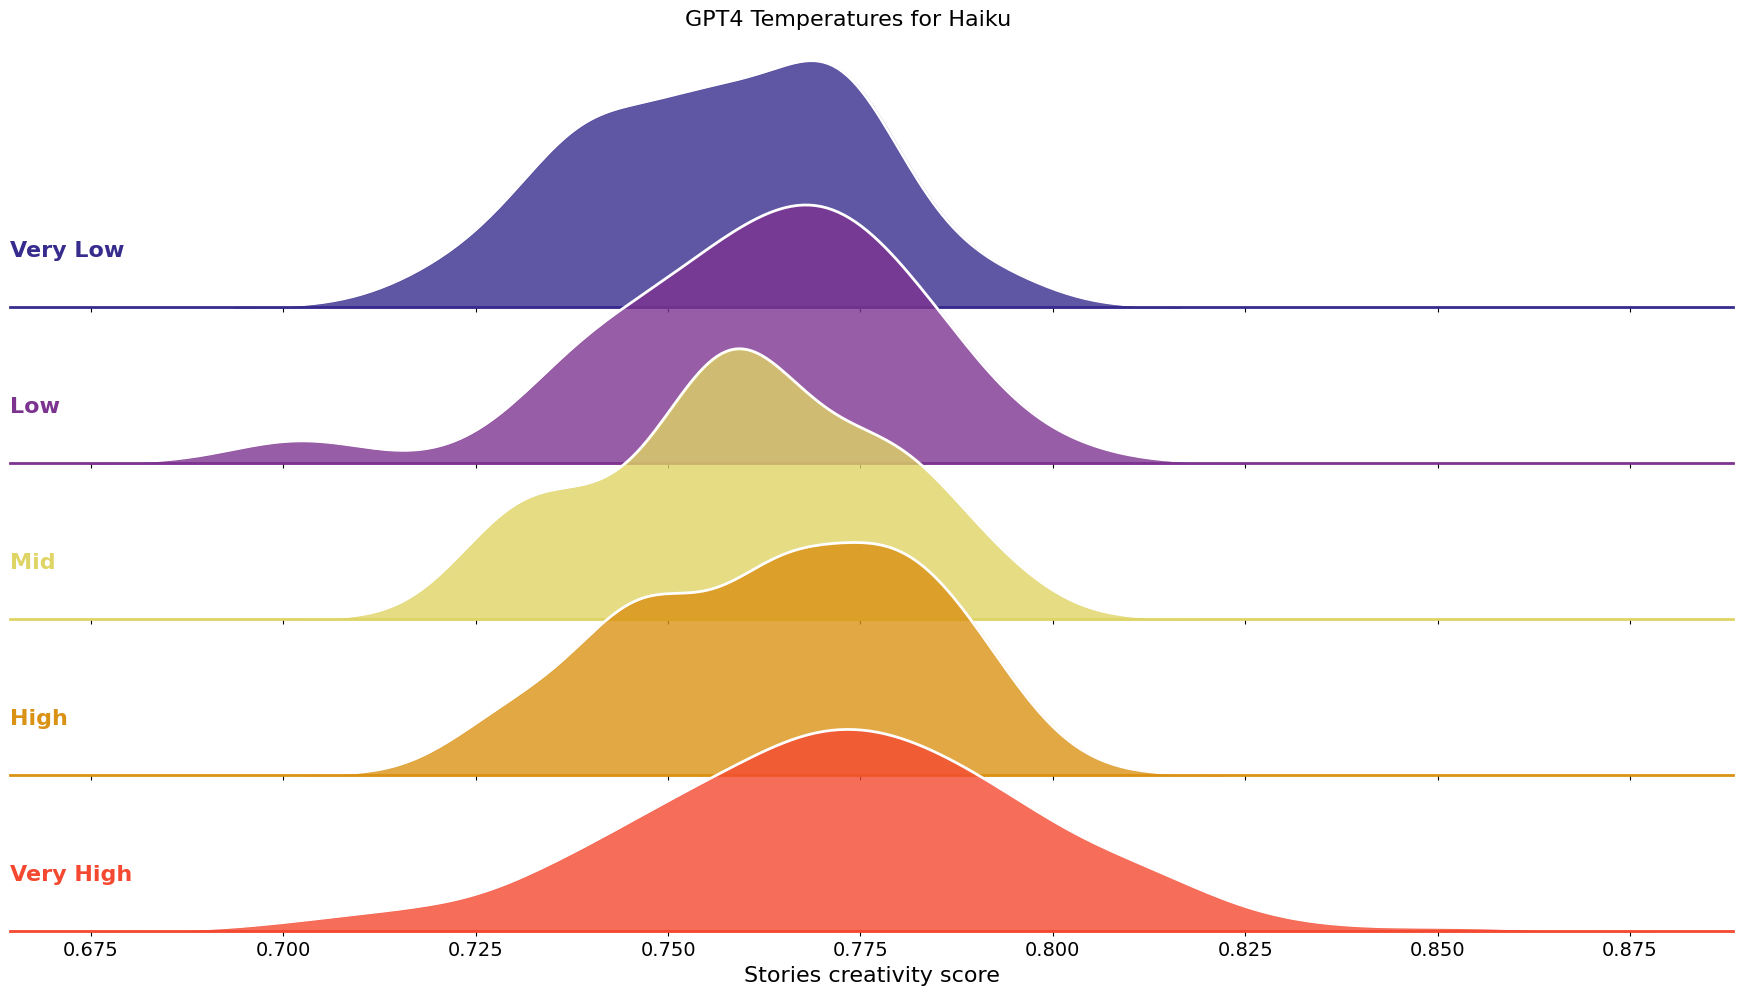

In [12]:
# Make a ridge plot like the one above looking at the effect of temperature on the DSI for each model separetaly
df = results_df.loc[(results_df['condition']=='haiku') & (results_df['model']=='GPT4')]
pal = sns.color_palette('CMRmap',n_colors=5, desat=.9)
pal = [pal[0], pal[1], pal[4], pal[3], pal[2]]
order = ["Very Low", "Low", "Mid", "High", "Very High"]
g = sns.FacetGrid(df, row="temp", hue="temp", aspect=9, height=2,palette=pal, hue_order=order, row_order=order)
# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "DSI",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "DSI", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "DSI")


for ax in g.axes.flat:
    ax.set_xlabel('Stories creativity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# add one title for all the subplots
g.fig.suptitle('GPT4 Temperatures for Haiku', fontsize=16)
g.savefig(f'../figures/GPT4_DSI_ridge_haiku_temp.png', dpi=300, bbox_inches='tight')

## Plot temperatures for synopsis
### GPT-3

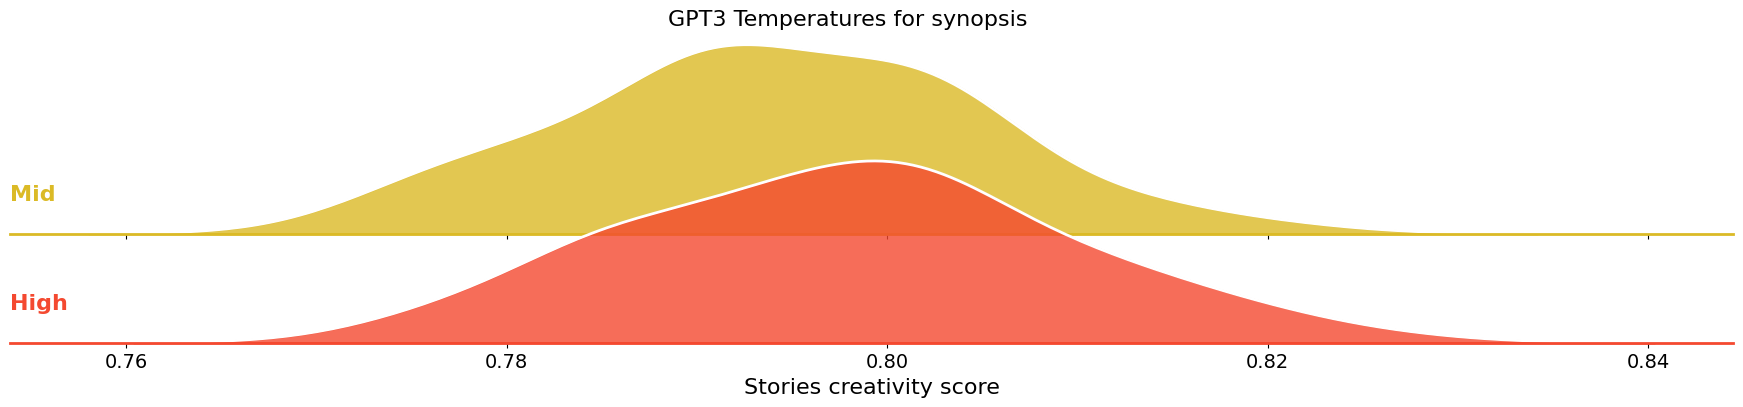

In [13]:
# Make a ridge plot like the one above looking at the effect of temperature on the DSI for each model separetaly
df = results_df.loc[(results_df['condition']=='synopsis') & (results_df['model']=='GPT3')]
order = ["Mid", "High", ]
pal = sns.color_palette('CMRmap',n_colors=3, desat=.9)[1:]
pal.reverse()
g = sns.FacetGrid(df, row="temp", hue="temp", aspect=9, height=2,palette=pal,hue_order=order, row_order=order)
# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "DSI",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "DSI", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "DSI")


for ax in g.axes.flat:
    ax.set_xlabel('Stories creativity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# add one title for all the subplots
g.fig.suptitle('GPT3 Temperatures for synopsis', fontsize=16)
g.savefig(f'../figures/GPT3_DSI_ridge_synopsis_temp.png', dpi=300, bbox_inches='tight')

### GPT-4

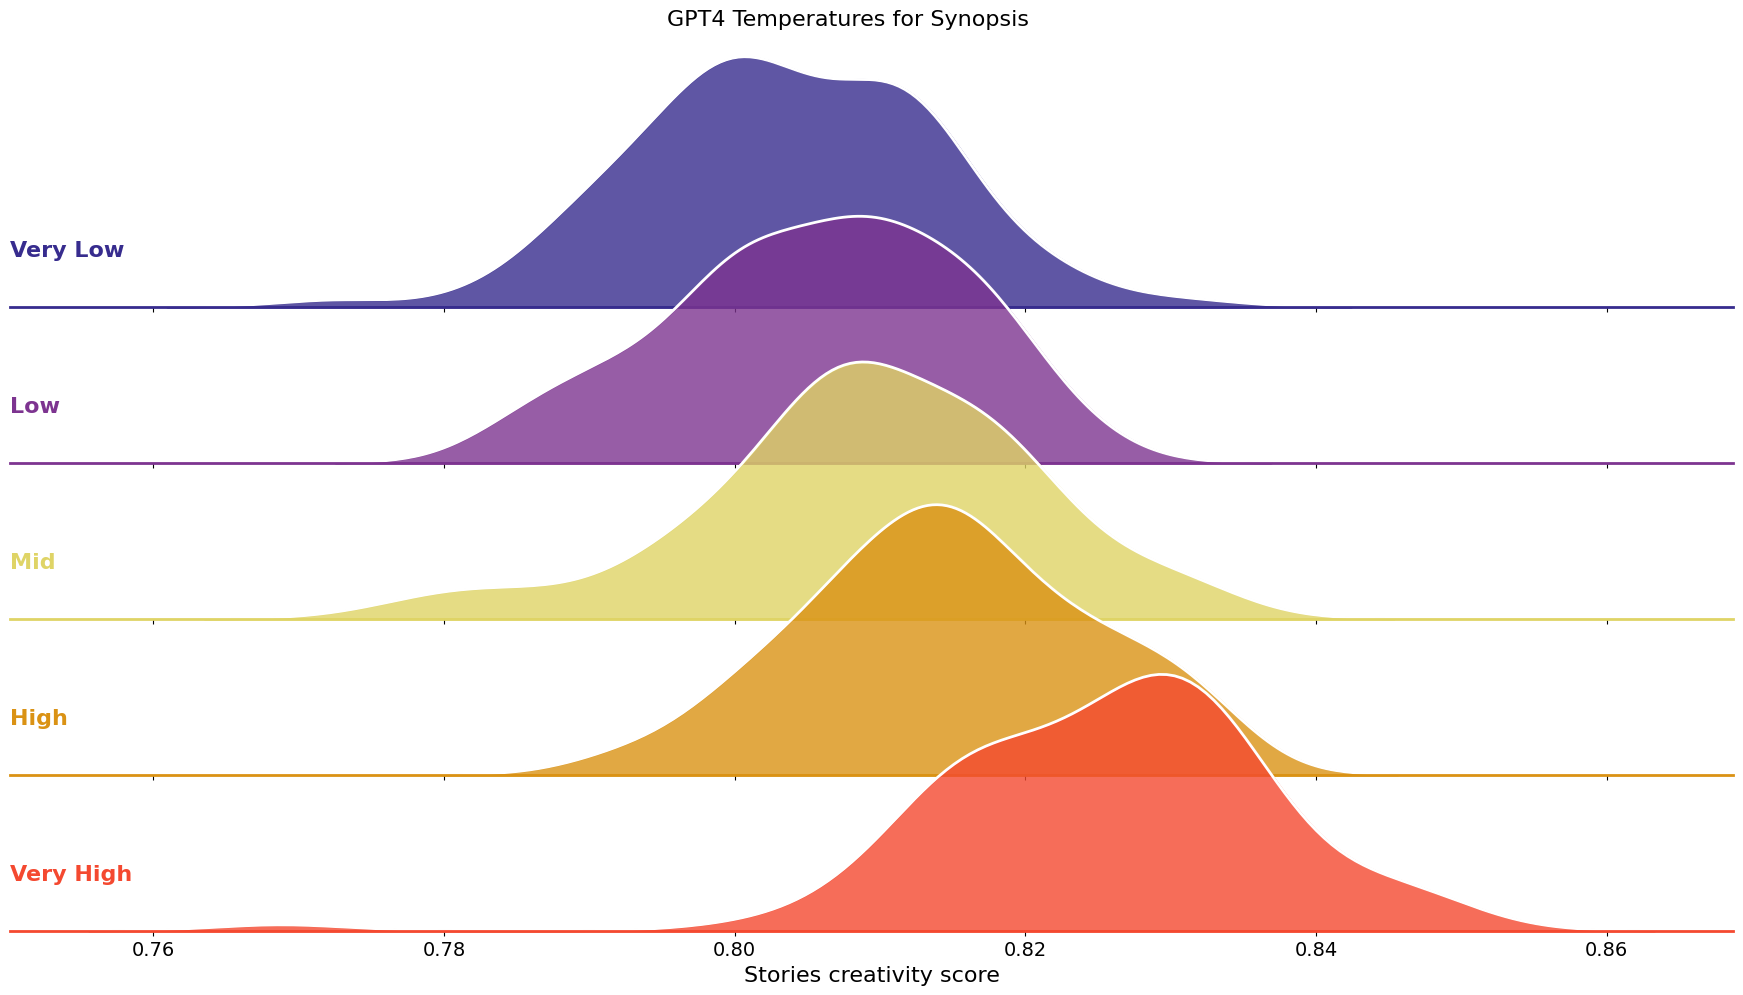

In [14]:
# Make a ridge plot like the one above looking at the effect of temperature on the DSI for each model separetaly
df = results_df.loc[(results_df['condition']=='synopsis') & (results_df['model']=='GPT4')]
pal = sns.color_palette('CMRmap',n_colors=5, desat=.9)
order = ["Very Low", "Low", "Mid", "High", "Very High"]
pal = [pal[0], pal[1], pal[4], pal[3], pal[2]]
g = sns.FacetGrid(df, row="temp", hue="temp", aspect=9, height=2,palette=pal,hue_order=order, row_order=order)
# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "DSI",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "DSI", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "DSI")


for ax in g.axes.flat:
    ax.set_xlabel('Stories creativity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# add one title for all the subplots
g.fig.suptitle('GPT4 Temperatures for Synopsis', fontsize=16)
g.savefig(f'../figures/GPT4_DSI_ridge_synopsis_temp.png', dpi=300, bbox_inches='tight')